In [58]:
import IPython
import os
os.system("ls *.md | grep -Ev 'README|audris|ports' | sed 's/\.md$//'| sort -u >ghids.txt")
with open('ghids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

['alexklibisz', 'almasaeed2010', 'awachte', 'beamad12', 'chumekaboom', 'codyjae', 'curtis017', 'cwilker', 'davpcunn', 'gsimpson723', 'inthesunset', 'jalomas7', 'jaredmichaelsmith', 'jherold2', 'jking018', 'jlong49', 'joseph346', 'jtyler7', 'justa-ghost', 'kdunn13', 'kylebshr', 'matsuobasho', 'mbenkhayal', 'milanjpatel', 'millermoore', 'mtwe', 'nateige', 'nwilder0', 'rerwin21', 'rroper1', 'ryancaldwell1', 'ryanwagn', 'sbradfo5', 'spicychckn', 'stonecoldhughes', 'tapjdey', 'teaguejt', 'tjonesster', 'w4d3']


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  str = a.read()
  documents .append(str)
  text = text + " " + str
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [60]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,alexklibisz,almasaeed2010,awachte,beamad12,chumekaboom,codyjae,curtis017,cwilker,davpcunn,gsimpson723,...,rroper1,ryancaldwell1,ryanwagn,sbradfo5,spicychckn,stonecoldhughes,tapjdey,teaguejt,tjonesster,w4d3
alexklibisz,1.000,0.099,0.108,0.164,0.123,0.146,0.131,0.153,0.060,0.139,...,0.153,0.129,0.060,0.115,0.089,0.118,0.129,0.193,0.043,0.132
almasaeed2010,0.099,1.000,0.125,0.134,0.078,0.083,0.154,0.100,0.067,0.219,...,0.087,0.100,0.054,0.209,0.066,0.093,0.060,0.131,0.036,0.075
awachte,0.108,0.125,1.000,0.198,0.072,0.129,0.121,0.141,0.049,0.155,...,0.156,0.192,0.068,0.176,0.069,0.138,0.097,0.171,0.057,0.131
beamad12,0.164,0.134,0.198,1.000,0.132,0.157,0.222,0.233,0.077,0.092,...,0.174,0.222,0.078,0.162,0.097,0.107,0.118,0.275,0.091,0.130
chumekaboom,0.123,0.078,0.072,0.132,1.000,0.119,0.101,0.127,0.176,0.090,...,0.142,0.131,0.068,0.127,0.122,0.140,0.240,0.152,0.052,0.119
codyjae,0.146,0.083,0.129,0.157,0.119,1.000,0.091,0.204,0.168,0.069,...,0.158,0.098,0.077,0.128,0.064,0.189,0.094,0.107,0.106,0.235
curtis017,0.131,0.154,0.121,0.222,0.101,0.091,1.000,0.109,0.035,0.149,...,0.120,0.122,0.066,0.096,0.091,0.180,0.093,0.179,0.037,0.138
cwilker,0.153,0.100,0.141,0.233,0.127,0.204,0.109,1.000,0.079,0.082,...,0.131,0.178,0.079,0.150,0.053,0.148,0.166,0.214,0.061,0.264
davpcunn,0.060,0.067,0.049,0.077,0.176,0.168,0.035,0.079,1.000,0.154,...,0.090,0.125,0.048,0.100,0.030,0.038,0.061,0.121,0.039,0.063
gsimpson723,0.139,0.219,0.155,0.092,0.090,0.069,0.149,0.082,0.154,1.000,...,0.087,0.174,0.033,0.127,0.125,0.097,0.095,0.138,0.035,0.109


1.3172260714434698


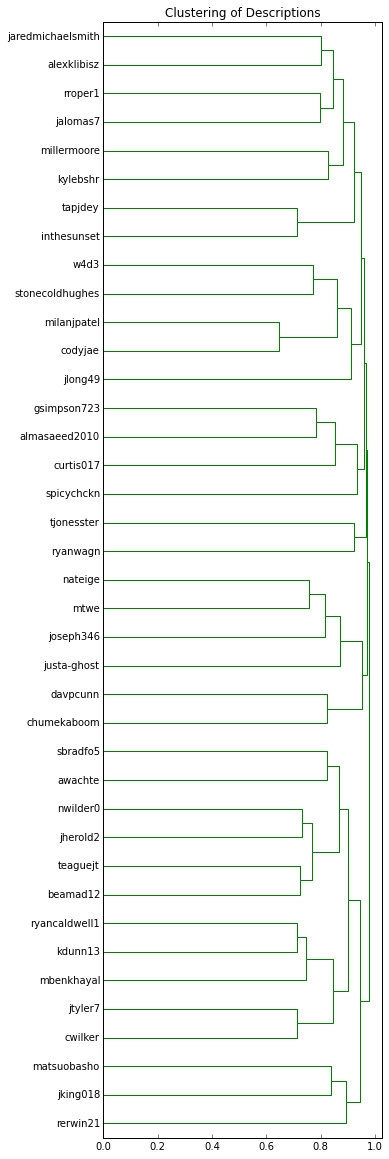

In [61]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
# Clean up labels (remove .md at the end)
flab = files
for i in range(len(files)):
    flab[i] = re.sub(r"\.[mM][dD]$", "", files[i])


dist2 = pdist(tfidf.A, 'euclidean')
#dist ij = dist2 [i*(n-1)+j]
ab = np.dot(tfidf.A[0,:]-tfidf.A[38,:],tfidf.A[0,:]-tfidf.A[38,:])
aa = np.dot(tfidf.A[0,:],tfidf.A[0,:])
bb = np.dot(tfidf.A[38,:],tfidf.A[38,:])
print(math.sqrt(ab/aa/bb))


# Calculate cosine distance (clustering needs distance, not similarity)   
dist1 = pdist(tfidf.A, 'cosine')
# Do clustering
linkage_matrix = linkage(dist1,method='complete')

# Plot results
plt.figure(1, figsize=(5, 20))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=17,labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")


In [62]:
import networkx as nx
import json
nxg = nx.Graph()

for i in range(len(files)-1):
    for j in range(i+1,len(files)):
        if (df.iloc[i,j] > .2):
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    
print (nxg.nodes())

['sbradfo5', 'nwilder0', 'ryancaldwell1', 'rroper1', 'jaredmichaelsmith', 'milanjpatel', 'stonecoldhughes', 'teaguejt', 'awachte', 'mtwe', 'almasaeed2010', 'justa-ghost', 'inthesunset', 'codyjae', 'nateige', 'jalomas7', 'jtyler7', 'curtis017', 'gsimpson723', 'kdunn13', 'beamad12', 'tapjdey', 'rerwin21', 'chumekaboom', 'jherold2', 'cwilker', 'w4d3', 'mbenkhayal']


In [63]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('r/students.json','w'))

In [64]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/r/students.html'
display(IFrame(viz_file, '100%', '600px'))